In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src.env.dunderbot_env import DunderBotEnv
import src.run as run
import src.load as load

loading config from config/config.yml
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# TODO:

- Visualize basic performance
    * Deal with time vector being longer than value vector in TradingChart rendering
- Add support for fractions of shares (and rename 'share' to 'asset')
- Reinstate portfolio features
- Refactor current reward and add some new ones
- figure out how to normalize values properly
    * do we have to account for prediction as well? That is, can/should we predict using values outside of 0-1 range?
- understand the rendering, especially during learning
- setup train/test functionality (separate reset functions? Multiple time periods for testing?)
- add distributions of actions as output during training and predition (latter more important)
- lock down the seeds (and decide in config from a few specific ones)
- setup performance output, what we need to make data driven decision
- Find as long time series of BTCUSD hourly (and daily) data as possible, quite shortright now
- Check float number type


# DONE: 
- add config
- modularize rewards
- own actions
- add more detailed actions for buy and sell amounts (still Discrete, I believe)
- wrap running code in function in main.py (to enable more dynamic data loading and train/test)
- own observations
- remove the bias when getting the observations (suggestion in the repo issues)
- download more interesting data and manually preprocess
- load interesting data, specified in config
- understand the time steps in learn and predict
- setup basic monitoring of training using TensorBoard

# Run

In [4]:
%%time
df = load.load_OHLC_data()
env = run.preprocess(df=df)
model = run.train(env=env, total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




--------------------------------------
| approxkl           | 0.00010769046 |
| clipfrac           | 0.0           |
| explained_variance | -3.73e-05     |
| fps                | 192           |
| n_updates          | 1             |
| policy_entropy     | 2.1971226     |
| policy_loss        | -0.001779476  |
| serial_timesteps   | 128           |
| time_elapsed       | 0.000141      |
| total_timesteps    | 128           |
| value_loss         | 72611.41      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0005131583 |
| clipfrac           | 0.0          |
| explained_variance | -7.27e-06    |
| fps                | 402          |
| n_updates          | 10           |
| policy_entropy     | 2.1

/code/src/env/dunderbot_env.py:87: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)


net_worth_ax: (17348.416666666664, 17357.583333333336)
net_worth_ax: (17348.416666666664, 17357.583333333336)
2017-07-01T20:00:00.000000000
17348.833333333332
2017-07-01T21:00:00.000000000
17348.875
2017-07-01T22:00:00.000000000
17348.916666666668
2017-07-01T23:00:00.000000000
17348.958333333332
2017-07-02T00:00:00.000000000
17349.0
2017-07-02T01:00:00.000000000
17349.041666666668
2017-07-02T02:00:00.000000000
17349.083333333332
2017-07-02T03:00:00.000000000
17349.125
2017-07-02T04:00:00.000000000
17349.166666666668
2017-07-02T05:00:00.000000000
17349.208333333332
2017-07-02T07:00:00.000000000
17349.291666666668
2017-07-02T08:00:00.000000000
17349.333333333332
2017-07-02T09:00:00.000000000
17349.375
2017-07-02T10:00:00.000000000
17349.416666666668
2017-07-02T11:00:00.000000000
17349.458333333332
2017-07-02T12:00:00.000000000
17349.5
2017-07-02T13:00:00.000000000
17349.541666666668
2017-07-02T14:00:00.000000000
17349.583333333332
2017-07-02T15:00:00.000000000
17349.625
2017-07-02T16:00:

/code/src/env/render/TradingChartStatic.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.price_ax.set_xticklabels(date_labels, rotation=45, horizontalalignment='right')


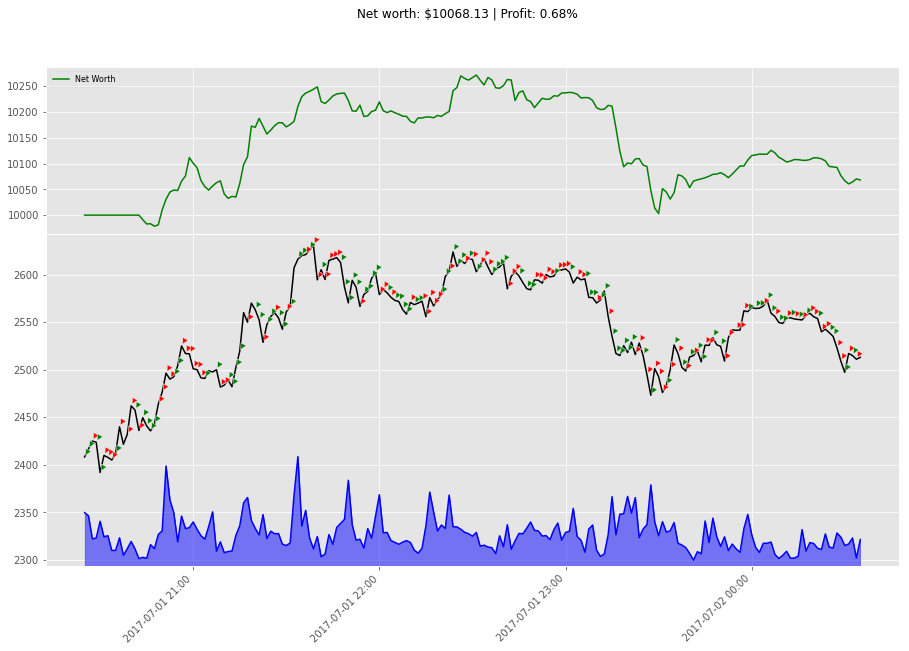

CPU times: user 7.56 s, sys: 413 ms, total: 7.98 s
Wall time: 7.91 s


In [12]:
%%time
run.predict(env=env, model=model, total_timesteps=200, rendermode='human')

# TODO rendering
- somethings way off! The should be one data point per step (i.e. per hour). Now there's a mismatch between the axis and the lines. The many trades indicate this. Trades should only come from prediction!
- make sure trades, net worth, and price are perfectlysynched
- plot trade volumes
- mark hold?
- Larger window size (skip it?)
- Axis titles / legend
- Add relevant system render mode

# Testing plot

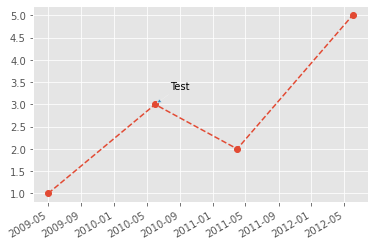

In [54]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = [dt.datetime(2009, 5, 1), dt.datetime(2010, 6, 1), 
     dt.datetime(2011, 4, 1), dt.datetime(2012, 6, 1)]
y = [1, 3, 2, 5]

fig, ax = plt.subplots()
ax.plot_date(mdates.date2num(x), y, linestyle='--')

ax.annotate('Test', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

fig.autofmt_xdate()
plt.show()

In [52]:
ax.get_xlim()

(733471.65, 734711.35)